# Úkoly

1. Vytvořte pole 3x4 typu `bool` se všemi prvky `True`.
2. Vytvořte matici 5x5 kde jediné nenulová prvky jsou [1, 2, 3, 4] pod hlavní diagonálou (nápověda - podívejte se na nápovědu funkce `diagflat`).
```
0 0 0 0 0
1 0 0 0 0
0 2 0 0 0
0 0 3 0 0 
0 0 0 4 0
```

In [2]:
import numpy as np
A = np.ones((3,4), dtype=bool)

print(A)

[[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]]


In [3]:
d = np.arange(1,5)
B = np.diagflat(d,-1)
print(B)

[[0 0 0 0 0]
 [1 0 0 0 0]
 [0 2 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 0]]


3. Z pole 8x8 samých nul vyvořte pomocí řezů co nejelegantnějším způsobem 8x8 matici, která vypadá jako šachovnice.
```
0 1 0 1 0 1 0 1
1 0 1 0 1 0 1 0
0 1 0 1 0 1 0 1
1 0 1 0 1 0 1 0
0 1 0 1 0 1 0 1
1 0 1 0 1 0 1 0
0 1 0 1 0 1 0 1
1 0 1 0 1 0 1 0
```
4. Pomocí `np.random.randint` vytvořte vektor dvouciferných kladných celých čísel. Poté pomocí indexu typu masky nahraďte liché hodnoty jejich opačnou hodnotou. Např. [11, 20, 42, 33] -> [-11, 20, 42, -33].

In [4]:
C = np.zeros((8,8), dtype = int)
C[::2,1::2] = 1
C[1::2,::2] = 1
print(C)

[[0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]]


In [5]:
x = np.random.randint(10,100,5)
print(x)
mask = np.array([i % 2 == 1 for i in x])
x[mask] *= -1
print(x)

[89 16 59 74 25]
[-89  16 -59  74 -25]


5. Ověřte empiricky na náhodné matici, že platí $(AB)^T = B^T A^T$


In [6]:
rand_mat_A = np.random.random((4,4))
rand_mat_B = np.random.random((4,4))
print((rand_mat_A*rand_mat_B).T == rand_mat_B.T * rand_mat_A.T)

[[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]]


6. Pro náhodné 1D vektory $u, v$ vypočítejte dyadický součin $uv$ $$(uv)_{ij} = u_iv_j$$ pomocí `newaxis`. Zkontrolujte s `np.outer(u, v)`

In [7]:
u = np.random.random(5)
v = np.random.random(5)
print(u)
print(v)

soucin = np.array(u[:,np.newaxis]*v[np.newaxis])
print(soucin)

print(soucin == np.outer(u,v))

[0.66164588 0.36935941 0.38479468 0.36649417 0.00904972]
[0.59729354 0.63938064 0.35518464 0.34133095 0.52995427]
[[0.39519681 0.42304357 0.23500645 0.22584022 0.35064206]
 [0.22061599 0.23616126 0.13119079 0.1260738  0.1957436 ]
 [0.22983538 0.24603027 0.13667316 0.13134233 0.20392359]
 [0.2189046  0.23432928 0.1301731  0.1250958  0.19422515]
 [0.00540534 0.00578621 0.00321432 0.00308895 0.00479594]]
[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]


7. Vytvořte šachovnicovou matici pomocí `tile`.

In [8]:
sach_2 = np.array([[0,1],[1,0]])
sach_8 = np.tile(sach_2, (4,4))
print(sach_8)

[[0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]]


# Domácí úkoly
## 1. Číselná spirála

Vytvořte čtvercovou matici o lichém počtu řádků a sloupců, která bude obsahovat čísla od 1 do $n^2$ tak, aby 1 byla uprostřed matice a číselná řada postupně narůstala po spirále proti směru hodinových ručiček.
- udělejte to pomocí NumPy přiřazování sliců do pole
- výstup musí být stejný jako primitivní funkce `integer_spiral` níže
- vyplňujte matici po "krůzích" okolo středu 
  - každý kruh je tvořen 4 částmi (hrana bez jednoho rohu)
  - využijte možnosti přiřazování sliců do pole a indexace s krokem -1
  - použijte `np.arange` pro vytvoření řady čísel kterou budete ukládat do hrany
- také si pomožte okrajem z 0, který nakonec oříznete

**Výsledná funkce bude mít tedy pouze jednu smyčku ve které do pole vstoupíme pouze 4x (jednou za každou hranu).** 

Na závěr porovnejte rychlost vaší funkce s `integer_spiral` níže.

In [2]:
import numpy as np
import matplotlib.pyplot as plt



In [92]:
# naplnění matice spirálou čísel
def integer_spiral(n):
    # abychom nemuseli řešit okraj = kontrolovat jestli jsme mimo matici
    # vytvoříme matici o velikosti n+2 x n+2
    # a vyplníme pouze středovou část
    A = np.zeros((n + 2, n + 2))

    pos_row = n//2 + 1  # počáteční pozice: střed matice
    pos_col = n//2 + 1

    i = 1  # číslo, které se bude vkládat do matice

    A[pos_row, pos_col] = i  # vložíme číslo do středu matice
    i += 1
    pos_row -= 1  # posuneme se na první volné místo

    while i <= n**2:  # dokud nejsme na konci matice
        A[pos_row, pos_col] = i  # vložíme číslo na aktuální pozici
        i += 1  # zvýšíme číslo, které se má vložit
        if A[pos_row - 1, pos_col] != 0 and A[pos_row, pos_col + 1] == 0:
            pos_col += 1  # posuneme se doprava
        elif A[pos_row, pos_col - 1] != 0:
            pos_row -= 1  # posuneme se nahoru
        elif A[pos_row + 1, pos_col] != 0:
            pos_col -= 1  # posuneme se doleva
        else:
            pos_row += 1  # posuneme se dolů

    return A[1:-1, 1:-1]  # ořízneme nulový okraj


In [181]:
A = integer_spiral(9)
print(A)

[[57. 56. 55. 54. 53. 52. 51. 50. 81.]
 [58. 31. 30. 29. 28. 27. 26. 49. 80.]
 [59. 32. 13. 12. 11. 10. 25. 48. 79.]
 [60. 33. 14.  3.  2.  9. 24. 47. 78.]
 [61. 34. 15.  4.  1.  8. 23. 46. 77.]
 [62. 35. 16.  5.  6.  7. 22. 45. 76.]
 [63. 36. 17. 18. 19. 20. 21. 44. 75.]
 [64. 37. 38. 39. 40. 41. 42. 43. 74.]
 [65. 66. 67. 68. 69. 70. 71. 72. 73.]]


In [171]:
def integer_spiral_numpy(n):
    #TODO naimplementujte viz zadání
    A = np.zeros((n+2,n+2),dtype=int)
    mid = n//2
    val = 1
    top,left,bottom,right = mid, mid, mid+1, mid+1
    while True:
        # prava hrana
        A[bottom:top:-1, right] = np.arange(val, val + bottom - top)
        val += bottom - top
        bottom +=1
        if val > n*n: break
        # vrchni hrana
        A[top, right:left-1:-1] = np.arange(val, val + right - left + 1)
        val += right - left + 1
        right +=1
        if val > n*n: break
        # leva hrana
        A[top+1:bottom+1, left] = np.arange(val, val + bottom - top)
        val += bottom - top
        top -= 1
        if val > n*n: break
        # spodni hrana
        A[bottom,left+1:right] = np.arange(val, val + right - left -1)
        val += right - left - 1
        left -= 1
        if val > n*n: break
        
    
    return A[1:-1,1:-1]

In [182]:
integer_spiral_numpy(9)


array([[57, 56, 55, 54, 53, 52, 51, 50, 81],
       [58, 31, 30, 29, 28, 27, 26, 49, 80],
       [59, 32, 13, 12, 11, 10, 25, 48, 79],
       [60, 33, 14,  3,  2,  9, 24, 47, 78],
       [61, 34, 15,  4,  1,  8, 23, 46, 77],
       [62, 35, 16,  5,  6,  7, 22, 45, 76],
       [63, 36, 17, 18, 19, 20, 21, 44, 75],
       [64, 37, 38, 39, 40, 41, 42, 43, 74],
       [65, 66, 67, 68, 69, 70, 71, 72, 73]])

## 2. Mandelbrotova množina
Vizualizujte Mandelbrotovu množinu na intervalu $[-2, 1] \times [-1.5, 1.5]$ pomocí `imshow`. Výsledek by měl vypadat jako následující obrázek.
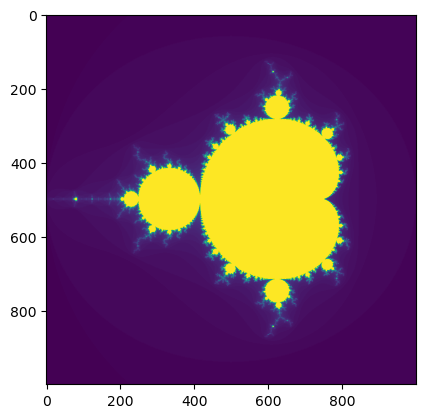

**Co je Mandelbrotova množina?**

Mandelbrotova množina je množina komplexních čísel $c$, pro které platí, že posloupnost $z_{i+1} = z_i^2 + c$ s $z_0 = 0$ konverguje (tj. $|z_i| < \infty$ pro všechna $n$).

**Co tedy udělat?**
- vytvořte matici $n\times n$ komplexních čísel $c$ na intervalu $[-2, 1] \times [-1.5, 1.5]$ (pomocí `np.mgrid` nebo `np.meshgrid`)
    - využite výhody vektorizace a toho, že numpy umí násobit komplexní čísla
- stanovit si počet iterací $k$, pro které budete testovat, zda posloupnost nedivergovala
    - to, že posloupnost diverguje, umíme pozorovat tak, že $|z_n| > 2$ pro nějaké $n$
- udělat $k$ iterací posloupnosti $z_{i+1} = z_i^2 + c$ a zjistit, kolikáté iteraci $k$ je se stalo, že $|z_i| < 2$
    - použijte pomocnou matici `divergence_matrix`, která bude mít stejný rozměr jako `c` a bude obsahovat počet iterací, kdy $|z_i| < 2$ pro každé $c$
- vytvořte obrázek pomocí `imshow` z `divergence_matrix`

In [25]:
def mandelbrot_set(x_min = -2, x_max = 1, y_min = -1.5, y_max = 1.5, n = 1000, k = 100):
    #generovani matice komplexnich cisel c
    x = np.linspace(x_min,x_max,n)
    y = np.linspace(y_min*1j,y_max*1j,n)
    xv, yv = np.meshgrid(x,y)
    c = xv+yv

    z = np.zeros_like(c)    #matice pro ukladani hodnot z posloupnosti
    divergence_matrix = np.full((n,n),k)    #divergence_matrix naplnim cislem k, budu menit hodnoty kde diverguje u mensi iterace nez k
    for i in range(k):
        z = z*z + c         
        diverging_indices = (np.absolute(z) > 2) & (diverging_indices == 0) #indexy kde hodnota je nad 2 a jeste ji nemam zaznamenanou
        divergence_matrix[diverging_indices] = i  #v kolikate iteraci hodnota prekrocila 2 zapisu do divergence_matrix
    return divergence_matrix
    
    

/tmp/ipykernel_19292/3757693977.py:11: RuntimeWarning: overflow encountered in multiply
  z = z*z + c
/tmp/ipykernel_19292/3757693977.py:11: RuntimeWarning: invalid value encountered in multiply
  z = z*z + c
/tmp/ipykernel_19292/3757693977.py:12: RuntimeWarning: overflow encountered in absolute
  diverging_indices = (np.absolute(z) > 2)


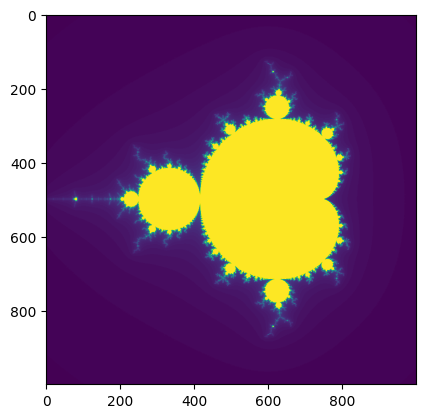

In [23]:
n = 1000
k = 100

divergence_matrix = mandelbrot_set(n=n, k=k)
plt.imshow(divergence_matrix)

# Bonus
- Zkuste si číselnou spirálu vykreslit, a vykreslit různé funkce, můžete dostat zajímavé obrázky.
- Zkuste místo posloupnosti 1,2,... udělat spirálu pouze z prvočísel.
- Zkuste vykresilt další typy fraktálů, např. Julia set viz [Wikipedia](https://en.wikipedia.org/wiki/Julia_set).

In [ ]:
A = integer_spiral(1001)
plt.imshow(A)
# new figure
plt.figure()
plt.imshow(np.sin(A*0.03))